# **DSCI 100 Planning Stage Proposal**

In [16]:
# import libraries!
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(janitor)

In [21]:
# read in the data
sessions_data <- read_csv("data/sessions.csv")

players_data <- read_csv("data/players.csv")
players_data <- players_data |> clean_names()

# check structure and summary
glimpse(sessions_data)
summary(sessions_data)
glimpse(players_data)
summary(players_data)

# count missing values
colSums(is.na(sessions_data))
colSums(is.na(players_data))

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashed_email <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


  experience        subscribe       hashed_email        played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

hashedEmail          start_time            end_time original_start_time 
                  0                   0                   2                   0 
  original_end_time 
                  2

experience    subscribe hashed_email played_hours         name       gender 
           0            0            0            0            0            0 
         age 
           2

### **Data Description**
We can observe that for players.csv, there is a total of 196 players. There are a total of 7 variables, including the following and their options/style of option:
- age (numeric)
- gender (Male, Female, Prefer not to say, Two-Spirited, Non-binary, Other)
- name (alphabetical)
- hours played (played_hours and numeric)
- hashedEmail (combination of letters and numbers)
- experience (Beginner, Amateur, Regular, Pro, Veteran)
- whether or not they are subscribed (subscribe and binary with TRUE or FALSE)

The average age appears to be 21.14 years old, with 144 subscribed and 52 not subscribed. The average hours played appears to be about 5.85 hours. Most of these variables are likely to be helpful, although having both the name and hashedEmail does not appear to be helpful to use together given they serve the same purpose of identification. 

|||


We can observe that for sessions.csv, there is a total count of 1,535 observations. There are a total of 5 variables, including the following and their options/style of option:
- hashedEmail (combination of letters and numbers)
- Session Start Time (start_time in the format of DD/MM/YY - 24:00)
- Session End Time (end_time in the same format as the start time above)
- Original Start Time (original_start_time taking milliseconds since 01/01/1970)
- Original End Time (original_end_time taking the same formatting as original start time)

The average original start time is is about 1.72e+12, and the average original end time is about the same given how large the numbers are. These are unlikely to be helpful variables, given there is often no discrepancy found between them. Isolating the start and end times would be much better by tidying them. 

However, this data was not wrangled or touched as it does not pertain to my specific research question.


In [18]:
# Here are the averages for the appropriate values which can have calculated averages from the players dataset.

players_table <- data.frame(
    Variable = c("Average Age", "Average Hours"),
    Value = c(21.14, 5.85))
players_table

Variable,Value
<chr>,<dbl>
Average Age,21.14
Average Hours,5.85


### **Question**

The broad question of interest I will be attempting to address is Question 3: 
- We are interested in demand forecasting, namely, what time windows are most likely to have large number of simultaneous players. This is because we need to ensure that the number of licenses on hand is sufficiently large to accommodate all parallel players with high probability.

The specific question I will be attempting to solve is as follows: Can the age of a player predict total playtime in the dataset? 

This dataset allows me to analyze how age relates to engagement. To address this, I will need to clean the data by removing missing or invalid age values and filtering out potential outliers in playtime. Then, I will create a dataset where observations represent a player with an age and their total playtime. Through this, I can visualize the relationship and then use a simple linear regression model to test whether player age predicts total playtime. The model will thus show whether age is significantly associated with how long players spend in the game.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


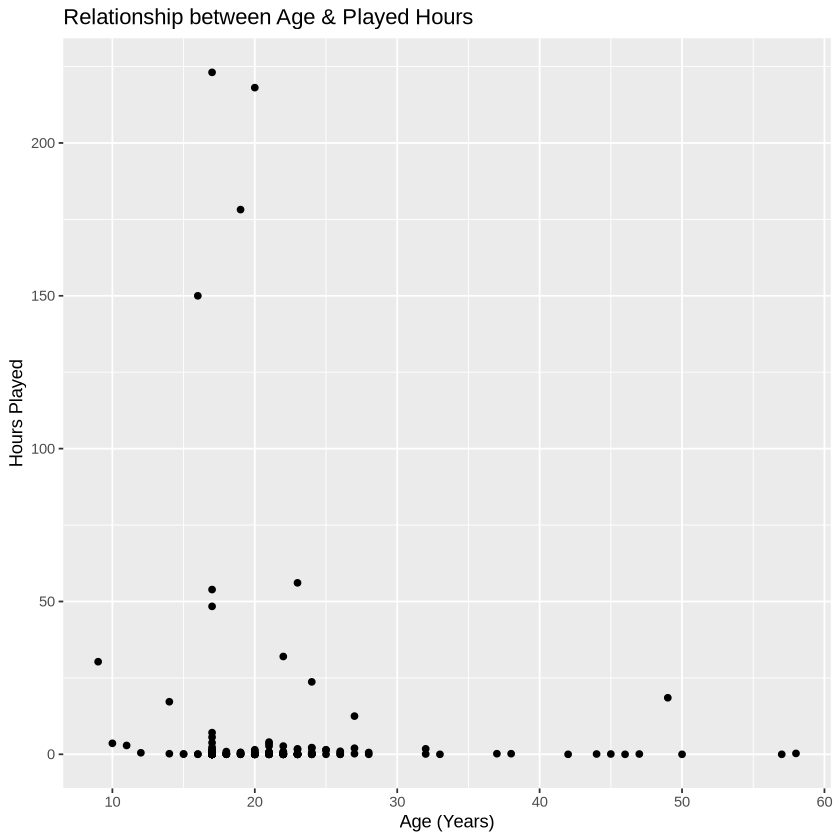

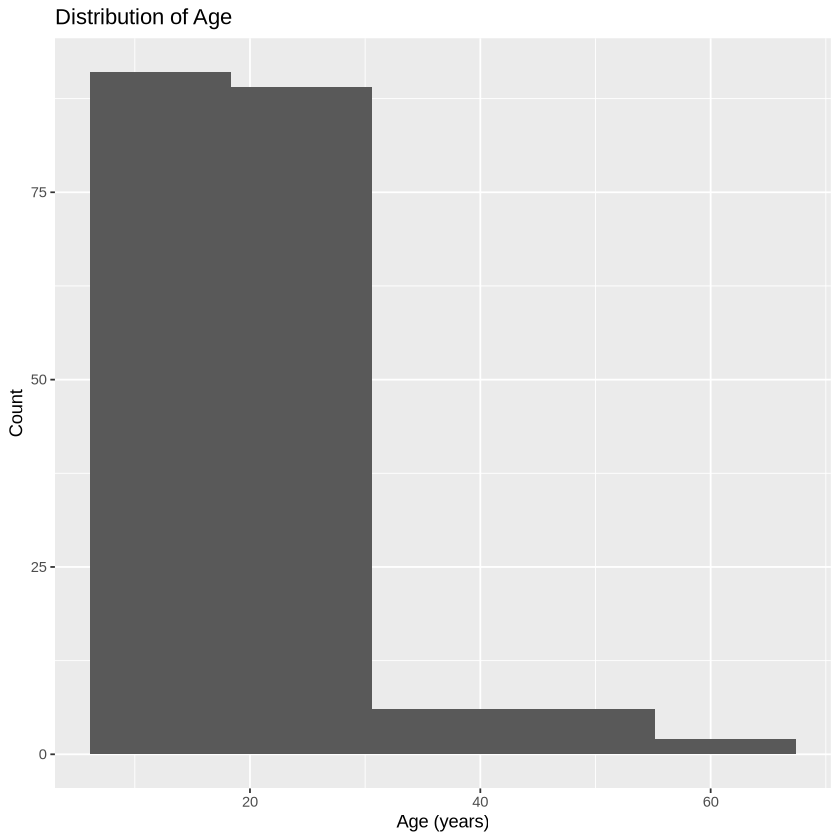

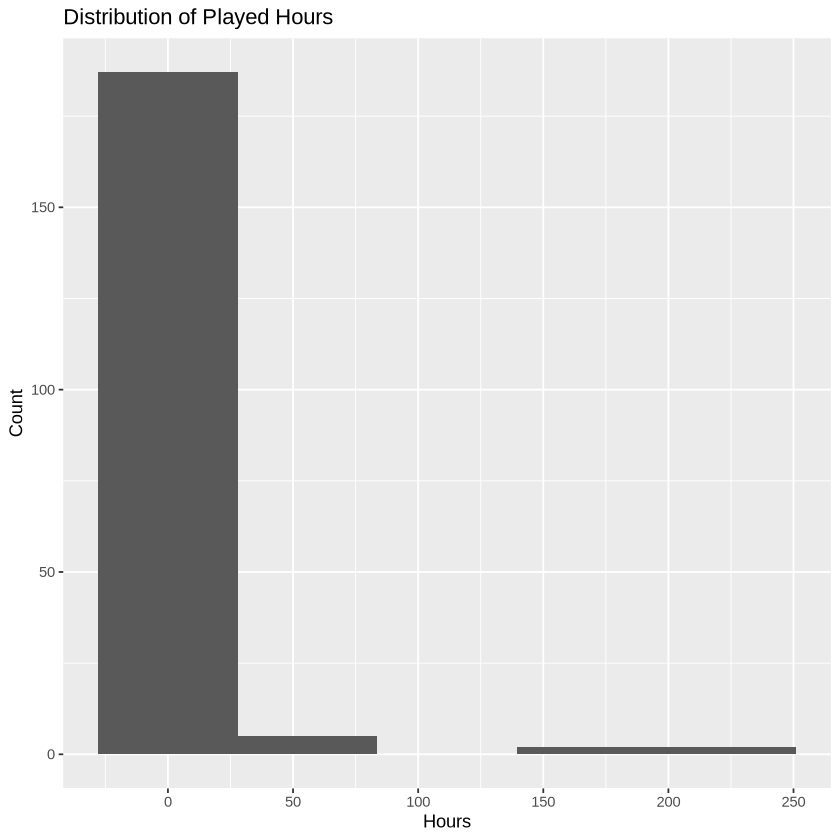

In [19]:
scatterplot <- ggplot(players_data, aes(x = age, y = played_hours)) +
    geom_point() +
    labs(title = "Relationship between Age & Played Hours",
         x = "Age (Years)", y = "Hours Played")
scatterplot

age_histogram <- ggplot(players_data, aes(x = age)) +
    geom_histogram(bins = 5) + 
    labs(title = "Distribution of Age", x = "Age (years)", y = "Count")
age_histogram 

hours_histogram <- ggplot(players_data, aes(x = played_hours)) +
    geom_histogram(bins = 5) + 
    labs(title = "Distribution of Played Hours", x = "Hours", y = "Count")
hours_histogram 

### **Exploratory Data Analysis & Visualization**
While the formatting of the players.csv data was already tidy, the only wrangling that was needed was to clean up the titles of the columns/variables of interest. Mainly, this involved the previously named Age, hashedEmail and played_hours variables. I used library(janitor) which I found from research online, and used clean_names() to clean up the names to make the formatting consistent across all variables! I did not touch sessions.csv as it is not necessary to answer my question.

Shown above I have created three different plots; one scatterplot and two histograms. 
The scatterplot plots age and hours played against each other. I decided to use this plot to see if there is any obvious trend between the two variables (ie. a higher age leading to less hours played or vice versa). While I can see that lower ages tend to have higher hours in a sparing amount of counts, it is not enough to appear to be a strong relationship.
Additionally, I used histograms to look at the distribution of both age and hours. This is because I was just curious to see what the distribution of both variables appeared to be, and I saw that the majority of the distribution for age are those under 30 years old, while the majority of the distribution of hours appeared to be less than around 20 hours total. 

### **Methods & Plans**

I will be using a simple linear regression to model the relationship between player age (explanatory variable) and total playtime (response variable). This is suitable because both variables are continuous, and the goal is to test whether age can predict total playtime. It provides interpretable coefficients which indicate the direction and strength of the relationship, and helps quantify how much playtime changes with age. 

We must assume that a linear relationship exists between age and total playtime, that observations are independent, and that there are no influential outliers that affect the model. 
Some notable limitations are that linear regression cannot capture nonlinear or complex patterns between age and playtime. 

Additionally, it is sensitive to outliers. We must also note that correlation does not imply causation, so results only show association, not influence. 

I will use simple linear regression to predict total playtime from age. Linear regression is ideal because the response variable is continuous, and the explanatory variable is also numeric. KNN could also be used, but for a single predictor and a simple, interpretable relationship, linear regression would be preferred. 

Before modeling, I will clean the data by removing missing or unrealistic values (ie. negative age or playtime). The dataset will then be randomly split into a training (70%) and testing (%30) subset to avoid overfitting. The model will be trained with the training set, and predictive accuracy will be evaluated on the test set with the RMSE metric. If neecessary, k-fold cross-validation within the training data can help ensure model stability (could use k = 5).